In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# load the dataset

data = pd.read_csv("shampoo.xls",usecols = [1], names = ['sales'],header = 0)

In [3]:
# convert to time series
data.index = pd.date_range(start = "1901-01",periods = len(data),freq = 'M')
# converts the dataset into a time series format with a monthly frequency

In [4]:
data.shape

(36, 1)

In [5]:
data

,sales
1901-01-31,266.0
1901-02-28,145.9
1901-03-31,183.1
1901-04-30,119.3
1901-05-31,180.3
1901-06-30,168.5
1901-07-31,231.8
1901-08-31,224.5
1901-09-30,192.8
1901-10-31,122.9


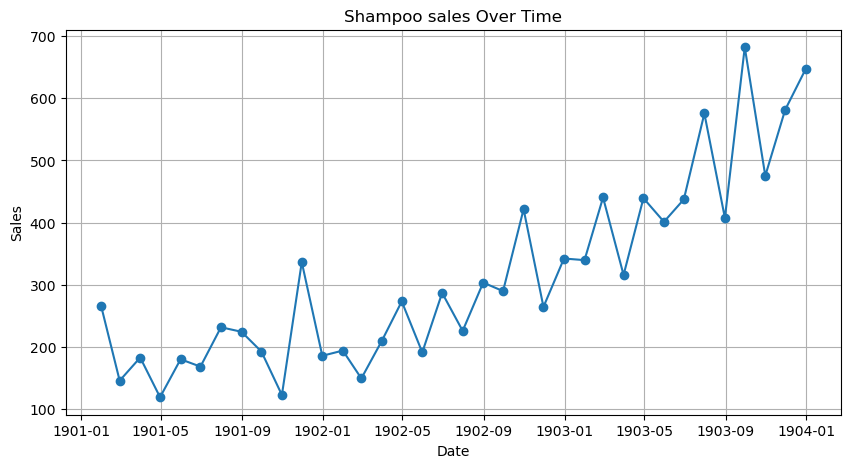

In [6]:
# visualize the data
plt.figure(figsize = (10,5))
plt.plot(data,marker = 'o',linestyle= '-')
plt.title("Shampoo sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid()
plt.show()

In [7]:
# Check Stationarity Using ADF Test
result = adfuller(data['sales'])
print("Adf Statistics:",result[0])
print("p-value",result[1])
if result[1]> 0.05:
    print("The data is non statisnarity. Differencing is required")
else:
    print("Data is Statisnaity")

Adf Statistics: 3.0601420836411797
p-value 1.0
The data is non statisnarity. Differencing is required


In [8]:
# Differencing to make data stationary
data_diff = data.diff().dropna()

In [9]:
data_diff

,sales
1901-02-28,-120.1
1901-03-31,37.2
1901-04-30,-63.8
1901-05-31,61.0
1901-06-30,-11.8
1901-07-31,63.3
1901-08-31,-7.3
1901-09-30,-31.7
1901-10-31,-69.9
1901-11-30,213.6


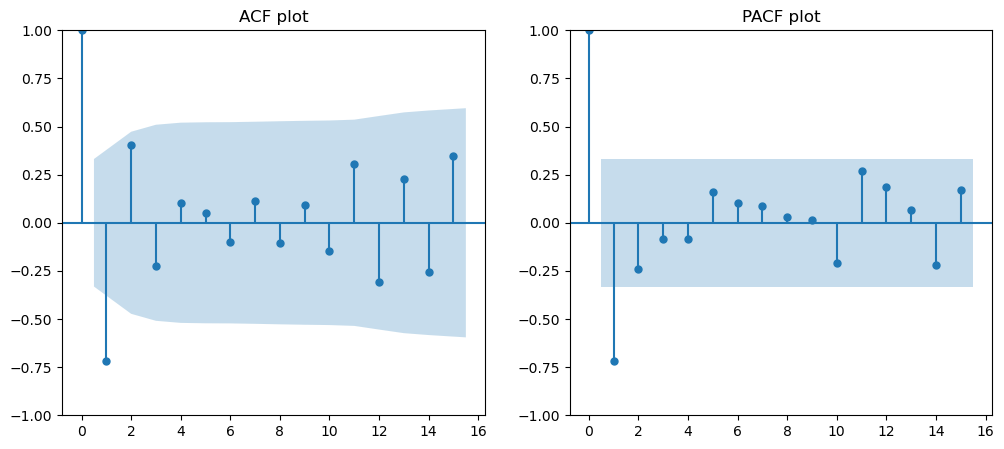

In [10]:
# plot ACF and PACF to determine p, q values

fig, axes = plt.subplots(1,2,figsize = (12,5))
plot_acf(data_diff,lags = 15,ax = axes[0])
plot_pacf(data_diff, lags = 15, method = 'ywm',ax = axes[1])
axes[0].set_title("ACF plot")
axes[1].set_title("PACF plot")
plt.show()

In [11]:
# Fit ARIMA model (p,d,q) = (5,1,0) based on ACF AND PACF Analysis
model = ARIMA(data, order = (5,1,0))
model_fit = model.fit()

In [12]:
# P = 5 (5 autogressive lags)
# d = 1 (differencing steps for statinary)
# q = 0 (no moving average components).

In [13]:
# print model summary

print(model_fit.summary())

# AIC & BIC I have to study. (h.M)

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Wed, 26 Mar 2025   AIC                            408.969
Time:                        16:37:00   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

In [14]:
# Forecasting future values
forecast_steps = 12 # predict next 12 month
forecast = model_fit.forecast(steps = forecast_steps)

In [15]:
forecast

1904-01-31    561.113738
1904-02-29    671.054471
1904-03-31    554.031815
1904-04-30    679.972138
1904-05-31    601.711133
1904-06-30    633.764693
1904-07-31    639.430681
1904-08-31    613.756567
1904-09-30    660.395042
1904-10-31    606.548068
1904-11-30    654.661988
1904-12-31    622.499770
Freq: M, Name: predicted_mean, dtype: float64

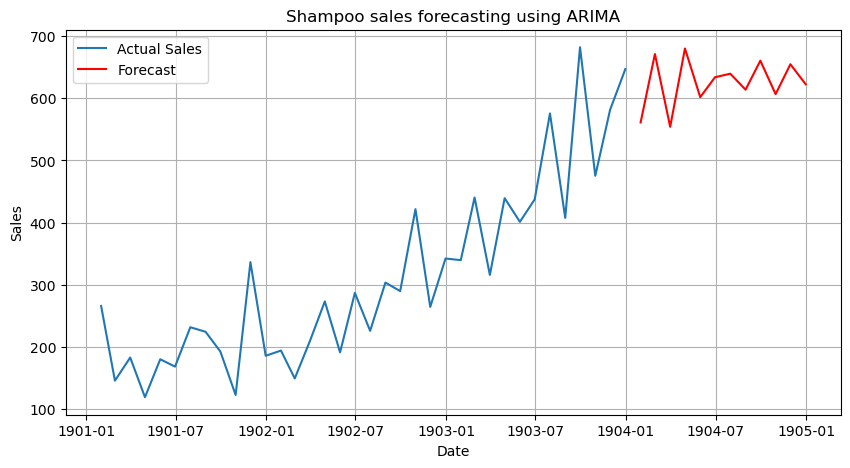

In [16]:
# plot actual vs predicted values

plt.figure(figsize = (10,5))
plt.plot(data, label = "Actual Sales")
plt.plot(pd.date_range(data.index[-1],periods = forecast_steps+1, freq = 'M')[1:],forecast, label = 'Forecast',color = 'Red')
plt.title ("Shampoo sales forecasting using ARIMA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()

In [17]:
# Walk forward ARIMA 

df = pd.read_csv("shampoo.xls",parse_dates = [0],header = 0)

In [18]:
data = df['Sales'].values

In [19]:
train_size = int(len(data) * 0.8)
train,test = data[:train_size],data[train_size:]

In [20]:
# Walk forward validation

history = train.tolist() # Convert train set to a list for dynamic updates
predictions = []

for t in test:
    # Fit ARIMA model
    model = ARIMA(data,order = (5,1,0))
    
    # predict next value
    y_pred = model_fit.predict(start = len(history),end = len(history))[0]
    predictions.append(y_pred)
    
    # Update history with actual observation
    history.append(t)

In [21]:
# Evaluate perfomance
rmse = np.sqrt(mean_squared_error(test,predictions))
print("Walk Forward Validation RMSE",rmse)

Walk Forward Validation RMSE 77.993496603424


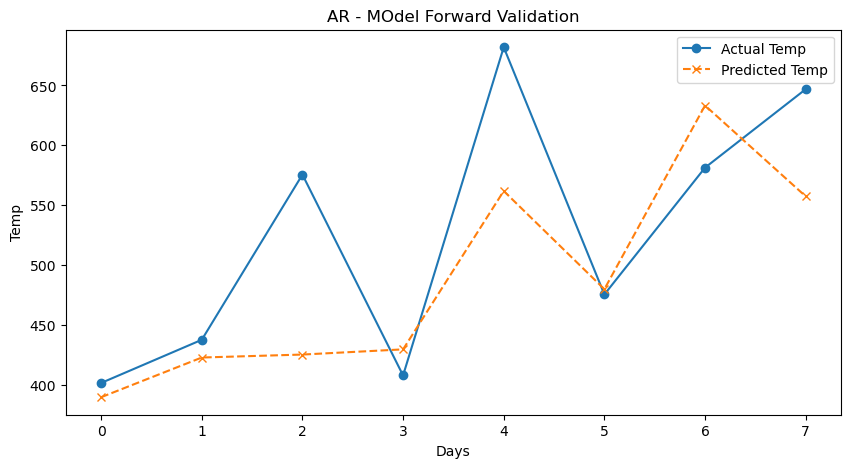

In [22]:
# plot actual vs predicted values

plt.figure(figsize = (10,5))
plt.plot(test,label = 'Actual Temp',marker = 'o')
plt.plot(predictions ,label = 'Predicted Temp',marker = 'x',linestyle = 'dashed')
plt.xlabel("Days")
plt.ylabel("Temp")
plt.title("AR - MOdel Forward Validation")
plt.legend()
plt.show()

In [23]:
# # Steps :

# 1. convert it into time series 
# 2. Decompose --> Trend, seasoanlity, Residual
# 3. check statinarity Using ADF Test p-value > 0.05 your data is statinarity
# # random walk main using persistance model (naive bayes)

In [ ]:
# why do we remove trend & seasonality ?